In [1]:
import pandas as pd

# Load datasets
btc_df = pd.read_csv('BIT_Dataset.csv')
eth_df = pd.read_csv('ETH_Dataset.csv')

# Clean and format columns
for df in [btc_df, eth_df]:
    # Remove commas and convert columns to float
    for col in ['Bid', 'Ask', 'High', 'Low', 'Open', 'BidNet']:
        df[col] = df[col].replace(',', '', regex=True).astype(float)

# Convert 'Exchange Date' to datetime format
btc_df['Exchange Date'] = pd.to_datetime(btc_df['Exchange Date'], format='%d-%b-%Y')
eth_df['Exchange Date'] = pd.to_datetime(eth_df['Exchange Date'], format='%d-%b-%Y')

# Sort both datasets by date
btc_df = btc_df.sort_values('Exchange Date')
eth_df = eth_df.sort_values('Exchange Date')

# Save cleaned datasets if needed
btc_df.to_csv('Cleaned_BIT_Dataset.csv', index=False)
eth_df.to_csv('Cleaned_ETH_Dataset.csv', index=False)

# Clean 'Refresh Rate' column and convert to float
for df in [btc_df, eth_df]:
    if 'Refresh Rate' in df.columns:
        df['Refresh Rate'] = df['Refresh Rate'].replace(',', '', regex=True).astype(float)

# Handle missing values
# Option 1: Drop rows with missing values
btc_df = btc_df.dropna()
eth_df = eth_df.dropna()

# Option 2: Impute missing values (use mean imputation for this example)
btc_df.fillna(btc_df.mean(), inplace=True)
eth_df.fillna(eth_df.mean(), inplace=True)

# Verify Bitcoin dataset
print("Cleaned Bitcoin Dataset:")
print(btc_df.info())
print(btc_df.head())

# Verify Ethereum dataset
print("\nCleaned Ethereum Dataset:")
print(eth_df.info())
print(eth_df.head())

# Save cleaned datasets for further use
btc_df.to_csv('Cleaned_BIT_Dataset.csv', index=False)
eth_df.to_csv('Cleaned_ETH_Dataset.csv', index=False)


Cleaned Bitcoin Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3750 entries, 3758 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Exchange Date  3750 non-null   datetime64[ns]
 1   Bid            3750 non-null   float64       
 2   Ask            3750 non-null   float64       
 3   High           3750 non-null   float64       
 4   Low            3750 non-null   float64       
 5   Open           3750 non-null   float64       
 6   Refresh Rate   3750 non-null   float64       
 7   BidNet         3750 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 263.7 KB
None
     Exchange Date     Bid     Ask    High     Low    Open  Refresh Rate  \
3758    2014-07-18  629.70  631.84  632.80  618.46  622.73        4986.0   
3757    2014-07-19  627.53  630.00  632.06  624.95  629.71        3889.0   
3756    2014-07-20  624.66  626.99  628.89  619.99  628.88        1891

/var/folders/nc/63k5v62j71x4b5g95s4b0hcc0000gn/T/ipykernel_22853/477101435.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df.fillna(eth_df.mean(), inplace=True)


In [2]:
print(btc_df.dtypes)  # Check data types of Bitcoin dataset
print(eth_df.dtypes)  # Check data types of Ethereum dataset


Exchange Date    datetime64[ns]
Bid                     float64
Ask                     float64
High                    float64
Low                     float64
Open                    float64
Refresh Rate            float64
BidNet                  float64
dtype: object
Exchange Date    datetime64[ns]
Bid                     float64
Ask                     float64
High                    float64
Low                     float64
Open                    float64
Refresh Rate            float64
BidNet                  float64
dtype: object


In [3]:
# Calculate Ethereum daily movement
eth_df['ETH_Movement'] = (eth_df['Bid'].diff() > 0).astype(int)

# Merge Ethereum's movement column with Bitcoin data
btc_df = pd.merge(btc_df, eth_df[['Exchange Date', 'ETH_Movement']], on='Exchange Date', how='inner')

print(btc_df.head())


  Exchange Date      Bid      Ask    High      Low     Open  Refresh Rate  \
0    2018-12-03  3879.82  3882.00  4275.3  3743.22  4102.69      108603.0   
1    2018-12-04  3898.23  3898.43  4122.9  3727.58  3870.55       96678.0   
2    2018-12-05  3720.88  3721.00  4000.2  3656.90  3896.61       89804.0   
3    2018-12-06  3593.40  3595.54  3915.0  3539.71  3722.60       98861.0   
4    2018-12-07  3389.11  3392.80  3710.5  3205.00  3594.45      108866.0   

   BidNet  ETH_Movement  
0 -222.82             0  
1   18.41             1  
2 -177.35             0  
3 -127.48             0  
4 -204.29             0  


/var/folders/nc/63k5v62j71x4b5g95s4b0hcc0000gn/T/ipykernel_22853/756264847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_df['ETH_Movement'] = (eth_df['Bid'].diff() > 0).astype(int)


In [4]:
# Merge Bitcoin and Ethereum datasets by date
merged_df = pd.merge(btc_df, eth_df[['Exchange Date', 'Bid']], on='Exchange Date', how='inner')

# Rename Ethereum's Bid price for clarity
merged_df.rename(columns={'Bid_y': 'ETH_Bid'}, inplace=True)

# Calculate Ethereum price movement
merged_df['ETH_Movement'] = (merged_df['ETH_Bid'].diff() > 0).astype(int)

# Drop the first row as it will have NaN for movement calculation
merged_df.dropna(subset=['ETH_Movement'], inplace=True)

# Rename Bitcoin's Bid for clarity
merged_df.rename(columns={'Bid_x': 'BTC_Bid'}, inplace=True)

print("Merged Dataset:")
print(merged_df.info())
print(merged_df.head())


Merged Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Exchange Date  2186 non-null   datetime64[ns]
 1   BTC_Bid        2186 non-null   float64       
 2   Ask            2186 non-null   float64       
 3   High           2186 non-null   float64       
 4   Low            2186 non-null   float64       
 5   Open           2186 non-null   float64       
 6   Refresh Rate   2186 non-null   float64       
 7   BidNet         2186 non-null   float64       
 8   ETH_Movement   2186 non-null   int64         
 9   ETH_Bid        2186 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 170.9 KB
None
  Exchange Date  BTC_Bid      Ask    High      Low     Open  Refresh Rate  \
0    2018-12-03  3879.82  3882.00  4275.3  3743.22  4102.69      108603.0   
1    2018-12-04  3898.23  3898.43  

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = merged_df.drop(columns=['Exchange Date', 'ETH_Movement', 'ETH_Bid'])  # Exclude target and unrelated columns
y = merged_df['ETH_Movement']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))



Training set size: 1748 rows
Testing set size: 438 rows
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       227
           1       0.76      0.78      0.77       211

    accuracy                           0.77       438
   macro avg       0.77      0.77      0.77       438
weighted avg       0.77      0.77      0.77       438



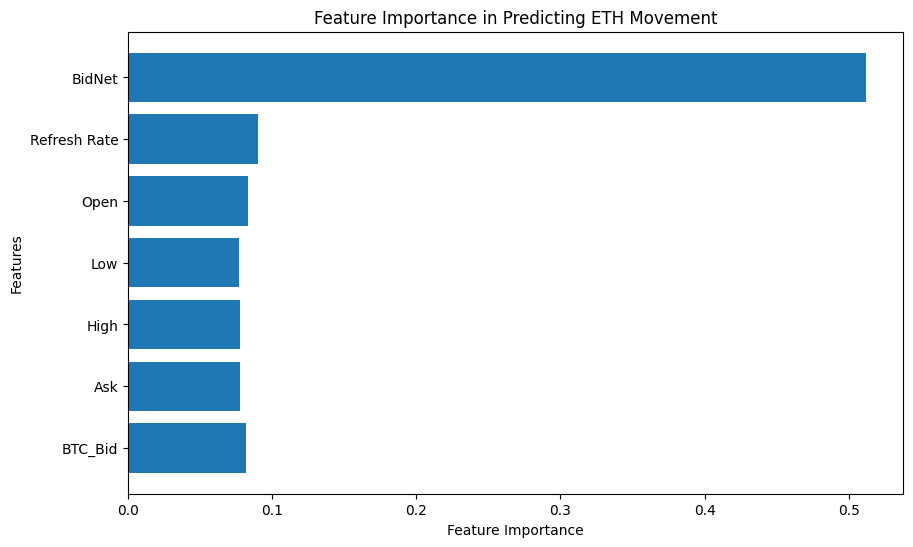

In [6]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting ETH Movement')
plt.show()


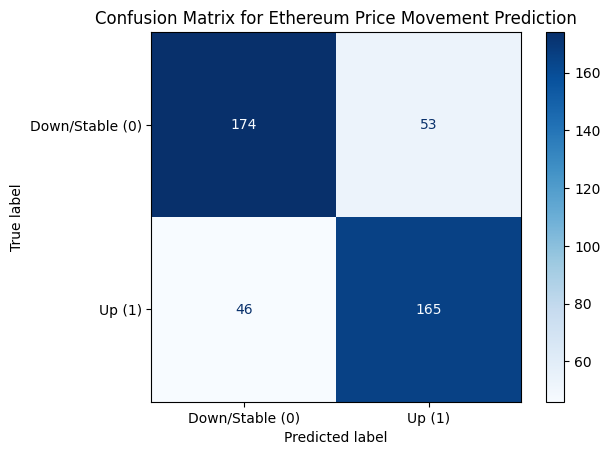

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down/Stable (0)', 'Up (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Ethereum Price Movement Prediction')
plt.show()


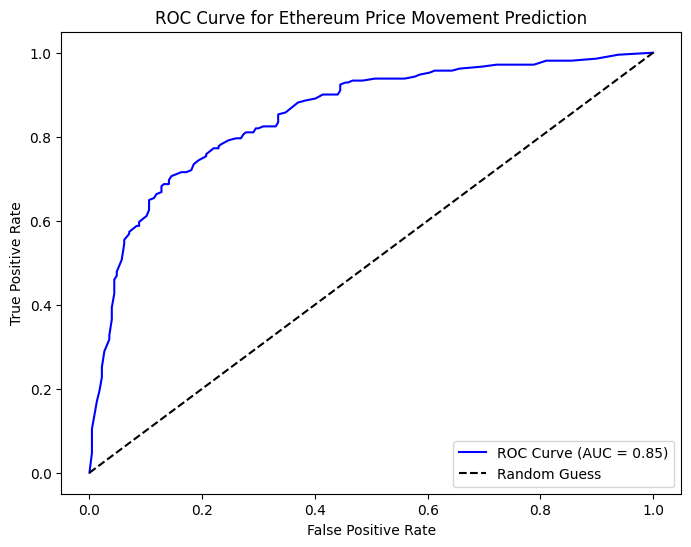

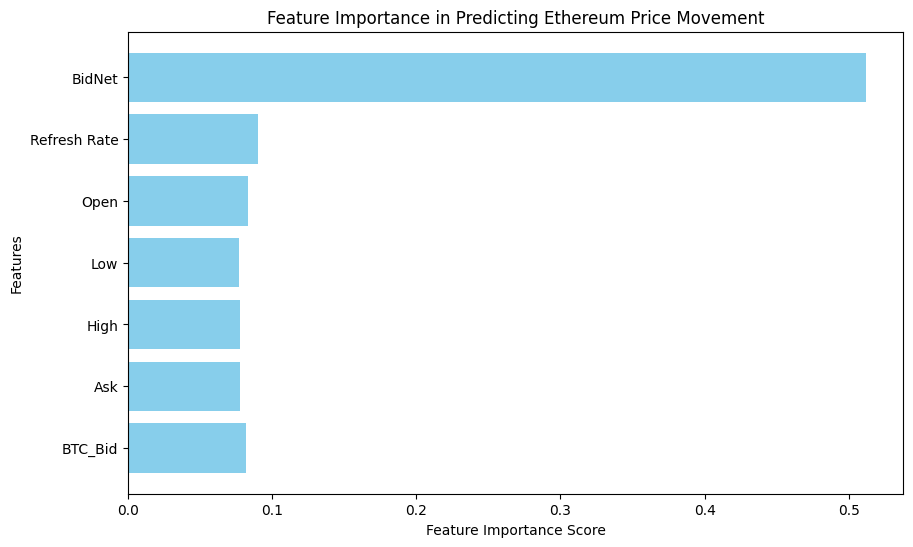

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ethereum Price Movement Prediction')
plt.legend(loc='lower right')
plt.show()


# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Ethereum Price Movement')
plt.show()


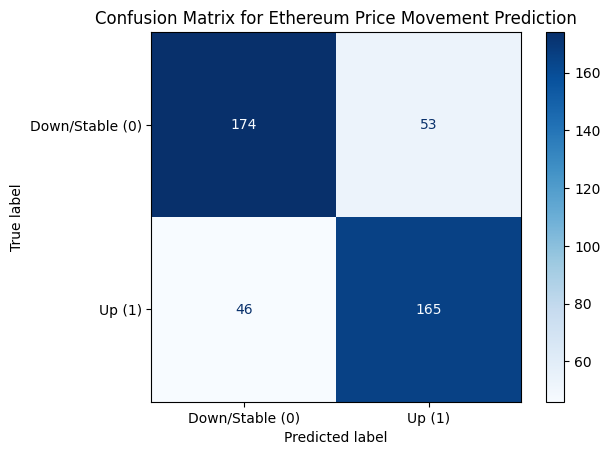

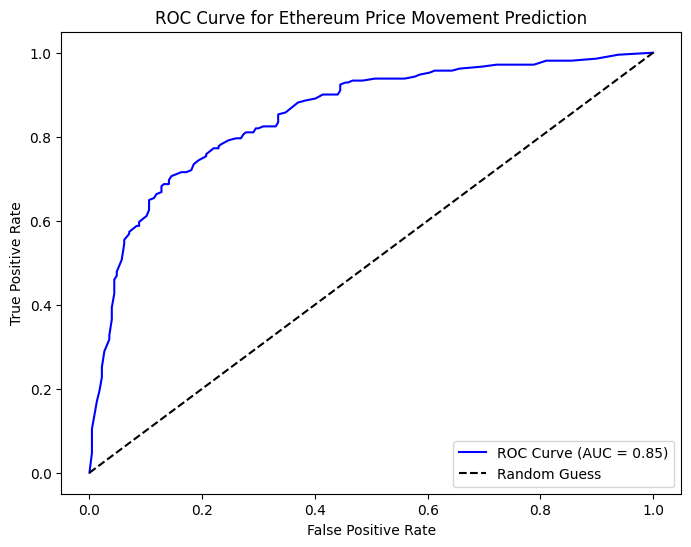

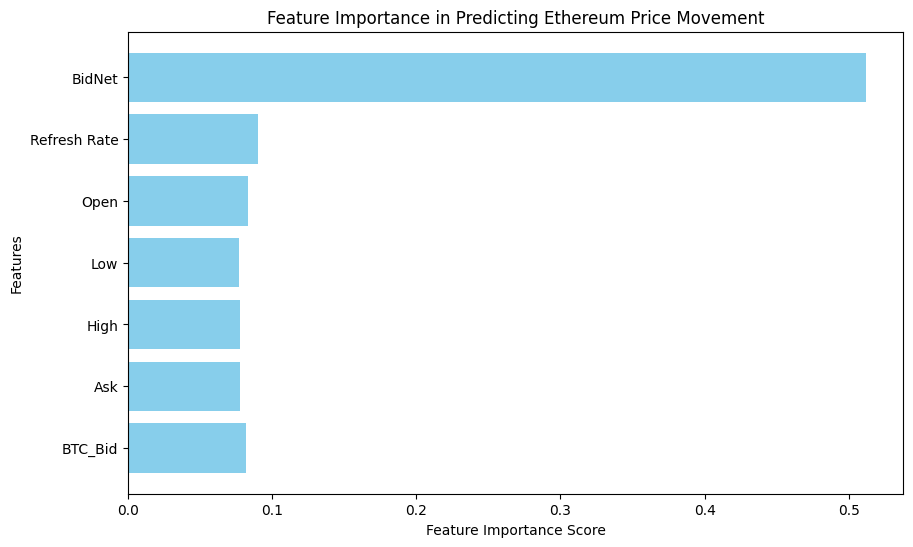

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down/Stable (0)', 'Up (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Ethereum Price Movement Prediction')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ethereum Price Movement Prediction')
plt.legend(loc='lower right')
plt.show()

# Plot feature importance
import matplotlib.pyplot as plt

# Extract feature importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Ethereum Price Movement')
plt.show()

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)


from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Logistic Regression Classification Report (Increased Iterations):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       227
           1       0.79      0.79      0.79       211

    accuracy                           0.79       438
   macro avg       0.79      0.79      0.79       438
weighted avg       0.79      0.79      0.79       438

Logistic Regression Classification Report (Scaled Features):
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       227
           1       0.80      0.74      0.77       211

    accuracy                           0.79       438
   macro avg       0.79      0.79      0.79       438
weighted avg       0.79      0.79      0.79       438



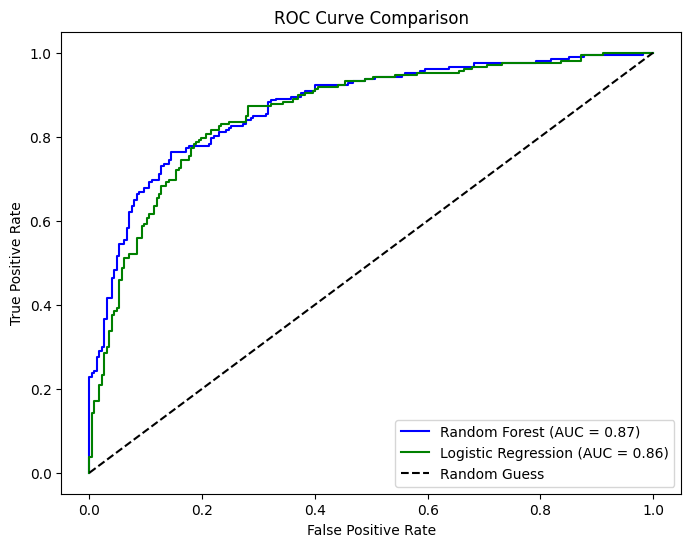

In [10]:
print("Best Hyperparameters:", grid_search.best_params_)

from sklearn.linear_model import LogisticRegression

# Increase max_iter to 2000
lr_model = LogisticRegression(random_state=42, max_iter=2000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report (Increased Iterations):")
print(classification_report(y_test, y_pred_lr))

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline: Scaling + Logistic Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42, max_iter=1000))
])

# Train and evaluate
lr_pipeline.fit(X_train, y_train)
y_pred_lr_scaled = lr_pipeline.predict(X_test)
print("Logistic Regression Classification Report (Scaled Features):")
print(classification_report(y_test, y_pred_lr_scaled))

from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest
y_pred_rf_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)

# Logistic Regression
y_pred_lr_proba = lr_pipeline.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_proba)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


